# Exploratory Data Analysis On Titanic Dataset

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading File 
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df['PassengerId'].nunique()

891

In [4]:
df = df.set_index('PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
# Descriptive Statistics
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Looking for basic info about columns and also handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
print(df['Age'].isnull().sum())
print(df['Cabin'].isnull().sum())
print(df['Embarked'].isnull().sum())

177
687
2


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
df.drop(['Cabin'], axis=1, inplace=True)

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [12]:
print(df['Age'].isnull().sum())
print(df['Embarked'].isnull().sum())

0
0


# Visualizing Data

In [38]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relation,Agegroup,FamilySize
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Adult,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Middle-Aged,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Adult,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Adult,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,Adult,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,Adult,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,3,Adult,3


In [39]:
# Counting Siblings + Parents
Relation_count = df['FamilySize'].value_counts()
Relation_count

FamilySize
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [13]:
# Counting males and females
gender_counts = df['Sex'].value_counts()
gender_counts

Sex
male      577
female    314
Name: count, dtype: int64

In [25]:
pclass_counts = df['Pclass'].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [19]:
df_embark = df['Embarked'].value_counts()
df_embark

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

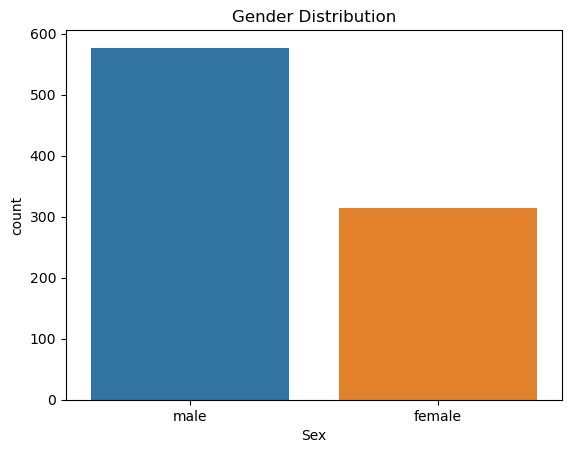

In [14]:
# Count of males and females
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.show()

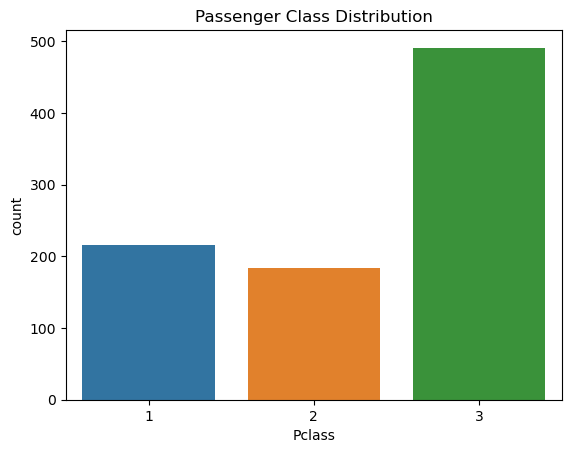

In [24]:
# Count of passengers by class
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

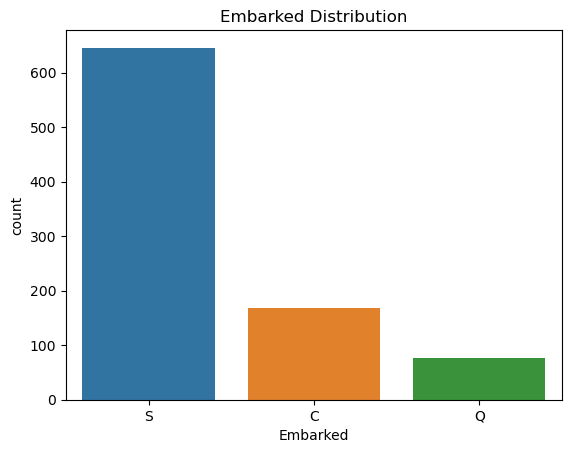

In [26]:
# Count of passengers by class
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')
plt.show()

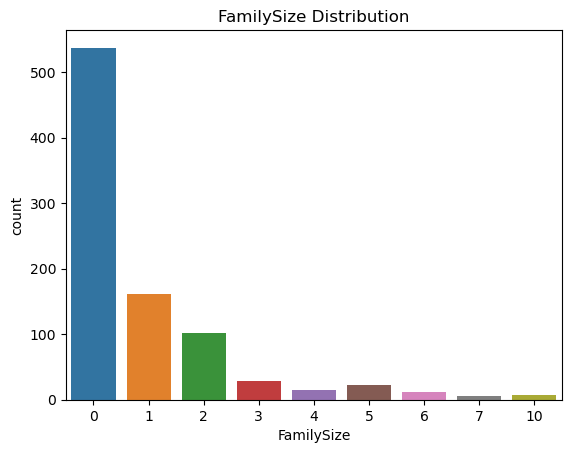

In [40]:
# Count of passengers by class
sns.countplot(x='FamilySize', data=df)
plt.title('FamilySize Distribution')
plt.show()

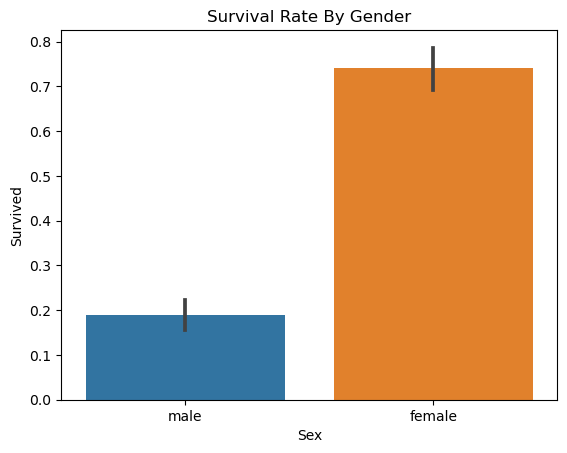

In [15]:
# Survival Rate By Gender
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate By Gender')
plt.show()

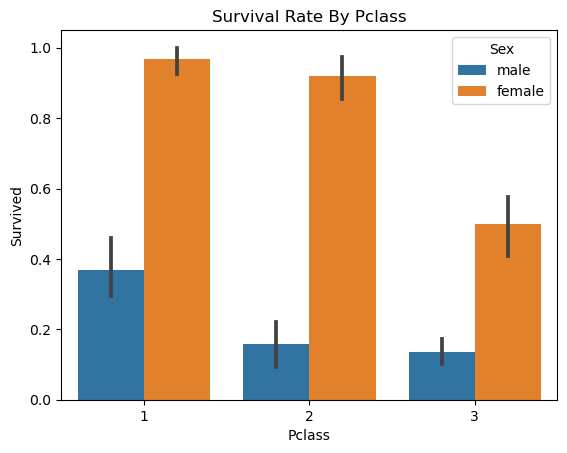

In [20]:
# Survival rate by Pclass
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rate By Pclass')
plt.show()

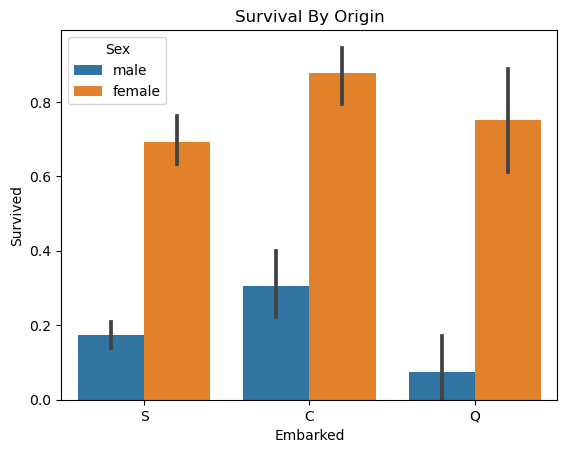

In [23]:
# Survival By Origin
sns.barplot(data=df, x='Embarked', y='Survived', hue='Sex')
plt.title('Survival By Origin')
plt.show()

In [32]:
# Creating AgeGroup
df['Agegroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80],
                       labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relation,Agegroup
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Middle-Aged
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,Adult
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,Adult
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,3,Adult


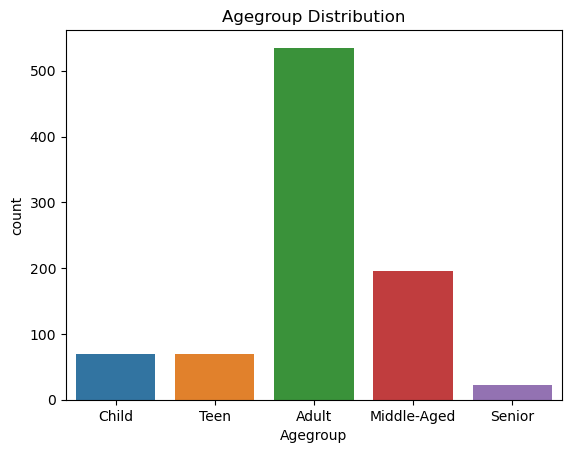

In [33]:
# Distribution of AgeGroup
sns.countplot(data=df, x='Agegroup')
plt.title('Agegroup Distribution')
plt.show()

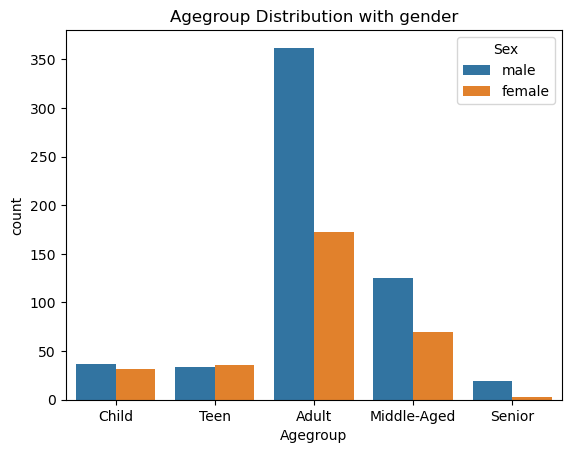

In [34]:
# Distribution of AgeGroup according to gender
sns.countplot(data=df, x='Agegroup', hue='Sex')
plt.title('Agegroup Distribution with gender')
plt.show()

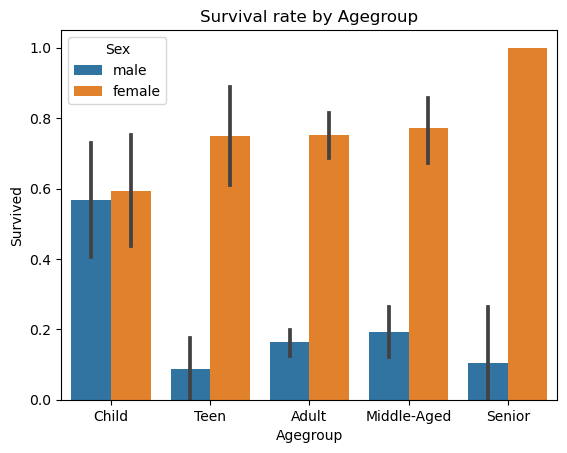

In [37]:
# Survival rate by Agegroup
sns.barplot(data=df, x='Agegroup', y='Survived', hue='Sex')
plt.title('Survival rate by Agegroup')
plt.show()

In [45]:
Max_fare = df['Fare'].max()
print(Max_fare)
Min_fare = df['Fare'].min()
print(Min_fare)
Avg_fare = df['Fare'].mean()
print(Avg_fare)

512.3292
0.0
32.204207968574636


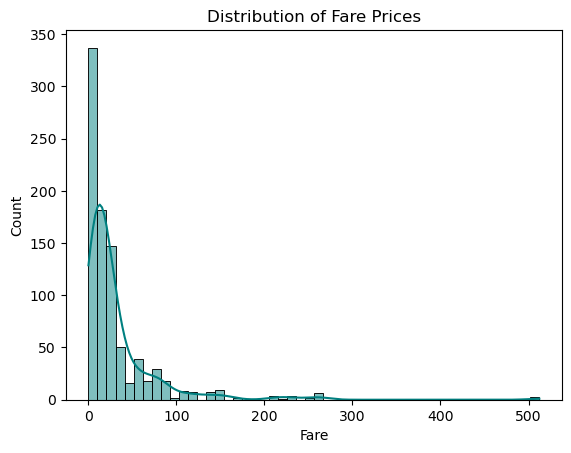

In [47]:
# Distribution of Fare prices
sns.histplot(df['Fare'], bins=50, kde=True, color='teal')
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

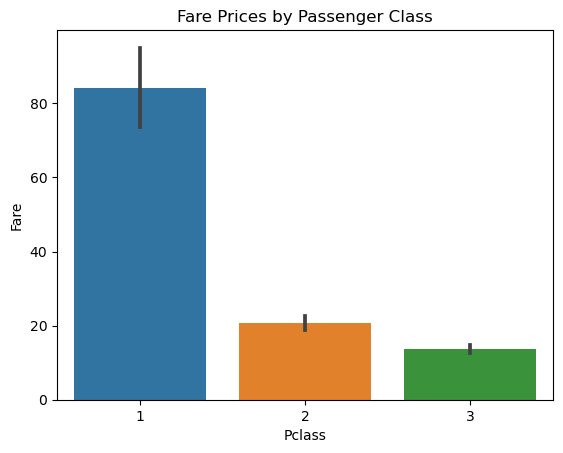

In [51]:
# Boxplot of Fare by Pclass
sns.barplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Prices by Passenger Class')
plt.show()

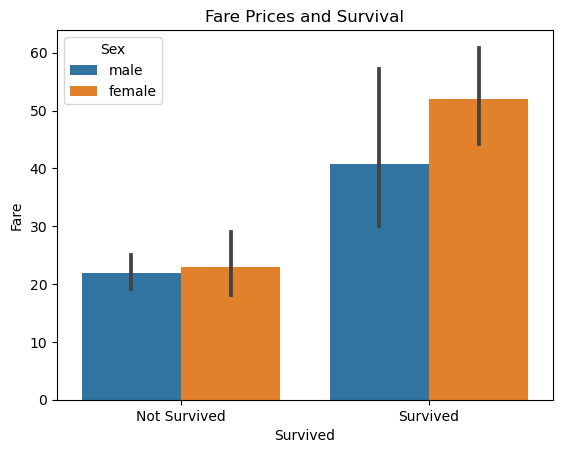

In [55]:
# Boxplot of Fare by Survival
sns.barplot(data=df, x='Survived', y='Fare', hue='Sex')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Fare Prices and Survival')
plt.show()

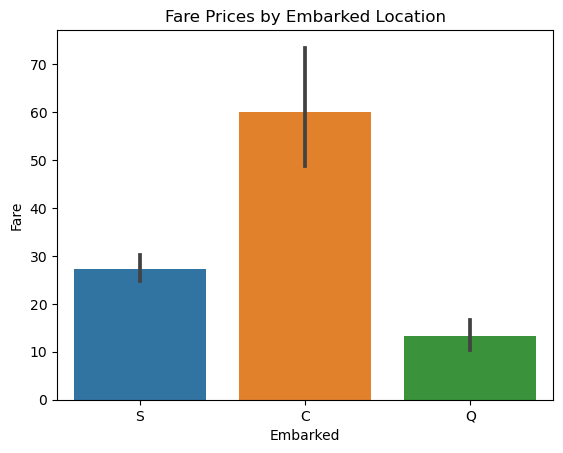

In [58]:
# Boxplot of Fare by Embarked location
sns.barplot(data=df, x='Embarked', y='Fare')
plt.title('Fare Prices by Embarked Location')
plt.show()